In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity


In [3]:
movies = pd.read_csv('/content/movies.csv')
ratings = pd.read_csv('/content/ratings.csv')

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [ ]:
movies.shape

(10329, 3)

In [ ]:
ratings.shape

(105339, 4)

In [ ]:
movies.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [ ]:
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [4]:
genres=[]
for genre in movies.genres:

    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)
movie_title=[]
for title in movies.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title)

In [5]:
print(genres)
print(movie_title)

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'War', 'Musical', 'Documentary', 'Western', 'Film-Noir', '(no genres listed)']
['Toy Story', 'Jumanji', 'Grumpier Old Men', 'Waiting to Exhale', 'Father of the Bride Part II', 'Heat', 'Sabrina', 'Tom and Huck', 'Sudden Death', 'GoldenEye', 'American President, The', 'Dracula: Dead and Loving It', 'Balto', 'Nixon', 'Cutthroat Island', 'Casino', 'Sense and Sensibility', 'Four Rooms', 'Ace Ventura: When Nature Calls', 'Money Train', 'Get Shorty', 'Copycat', 'Assassins', 'Powder', 'Leaving Las Vegas', 'Othello', 'Now and Then', 'Persuasion', 'City of Lost Children, The (Cité des enfants perdus, La)', 'Shanghai Triad (Yao a yao yao dao waipo qiao)', 'Dangerous Minds', 'Twelve Monkeys (a.k.a. 12 Monkeys)', 'Wings of Courage', 'Babe', 'Carrington', 'Dead Man Walking', 'Clueless', 'Cry, the Beloved Country', 'Richard III', 'Dead Presidents', 'Res

In [6]:
df=pd.merge(ratings,movies, how='left',on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1.217898e+09,Casino (1995),Crime|Drama
1,1,24,1.5,1.217896e+09,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1.217896e+09,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1.217897e+09,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1.217897e+09,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [7]:
df1=df.groupby(['title'])[['rating']].sum()
high_rated=df1.nlargest(20,'rating')
high_rated.head()

,rating
title,
"Shawshank Redemption, The (1994)",675.0
Pulp Fiction (1994),636.5
Forrest Gump (1994),583.0
Star Wars: Episode IV - A New Hope (1977),574.5
"Silence of the Lambs, The (1991)",559.0


<BarContainer object of 20 artists>

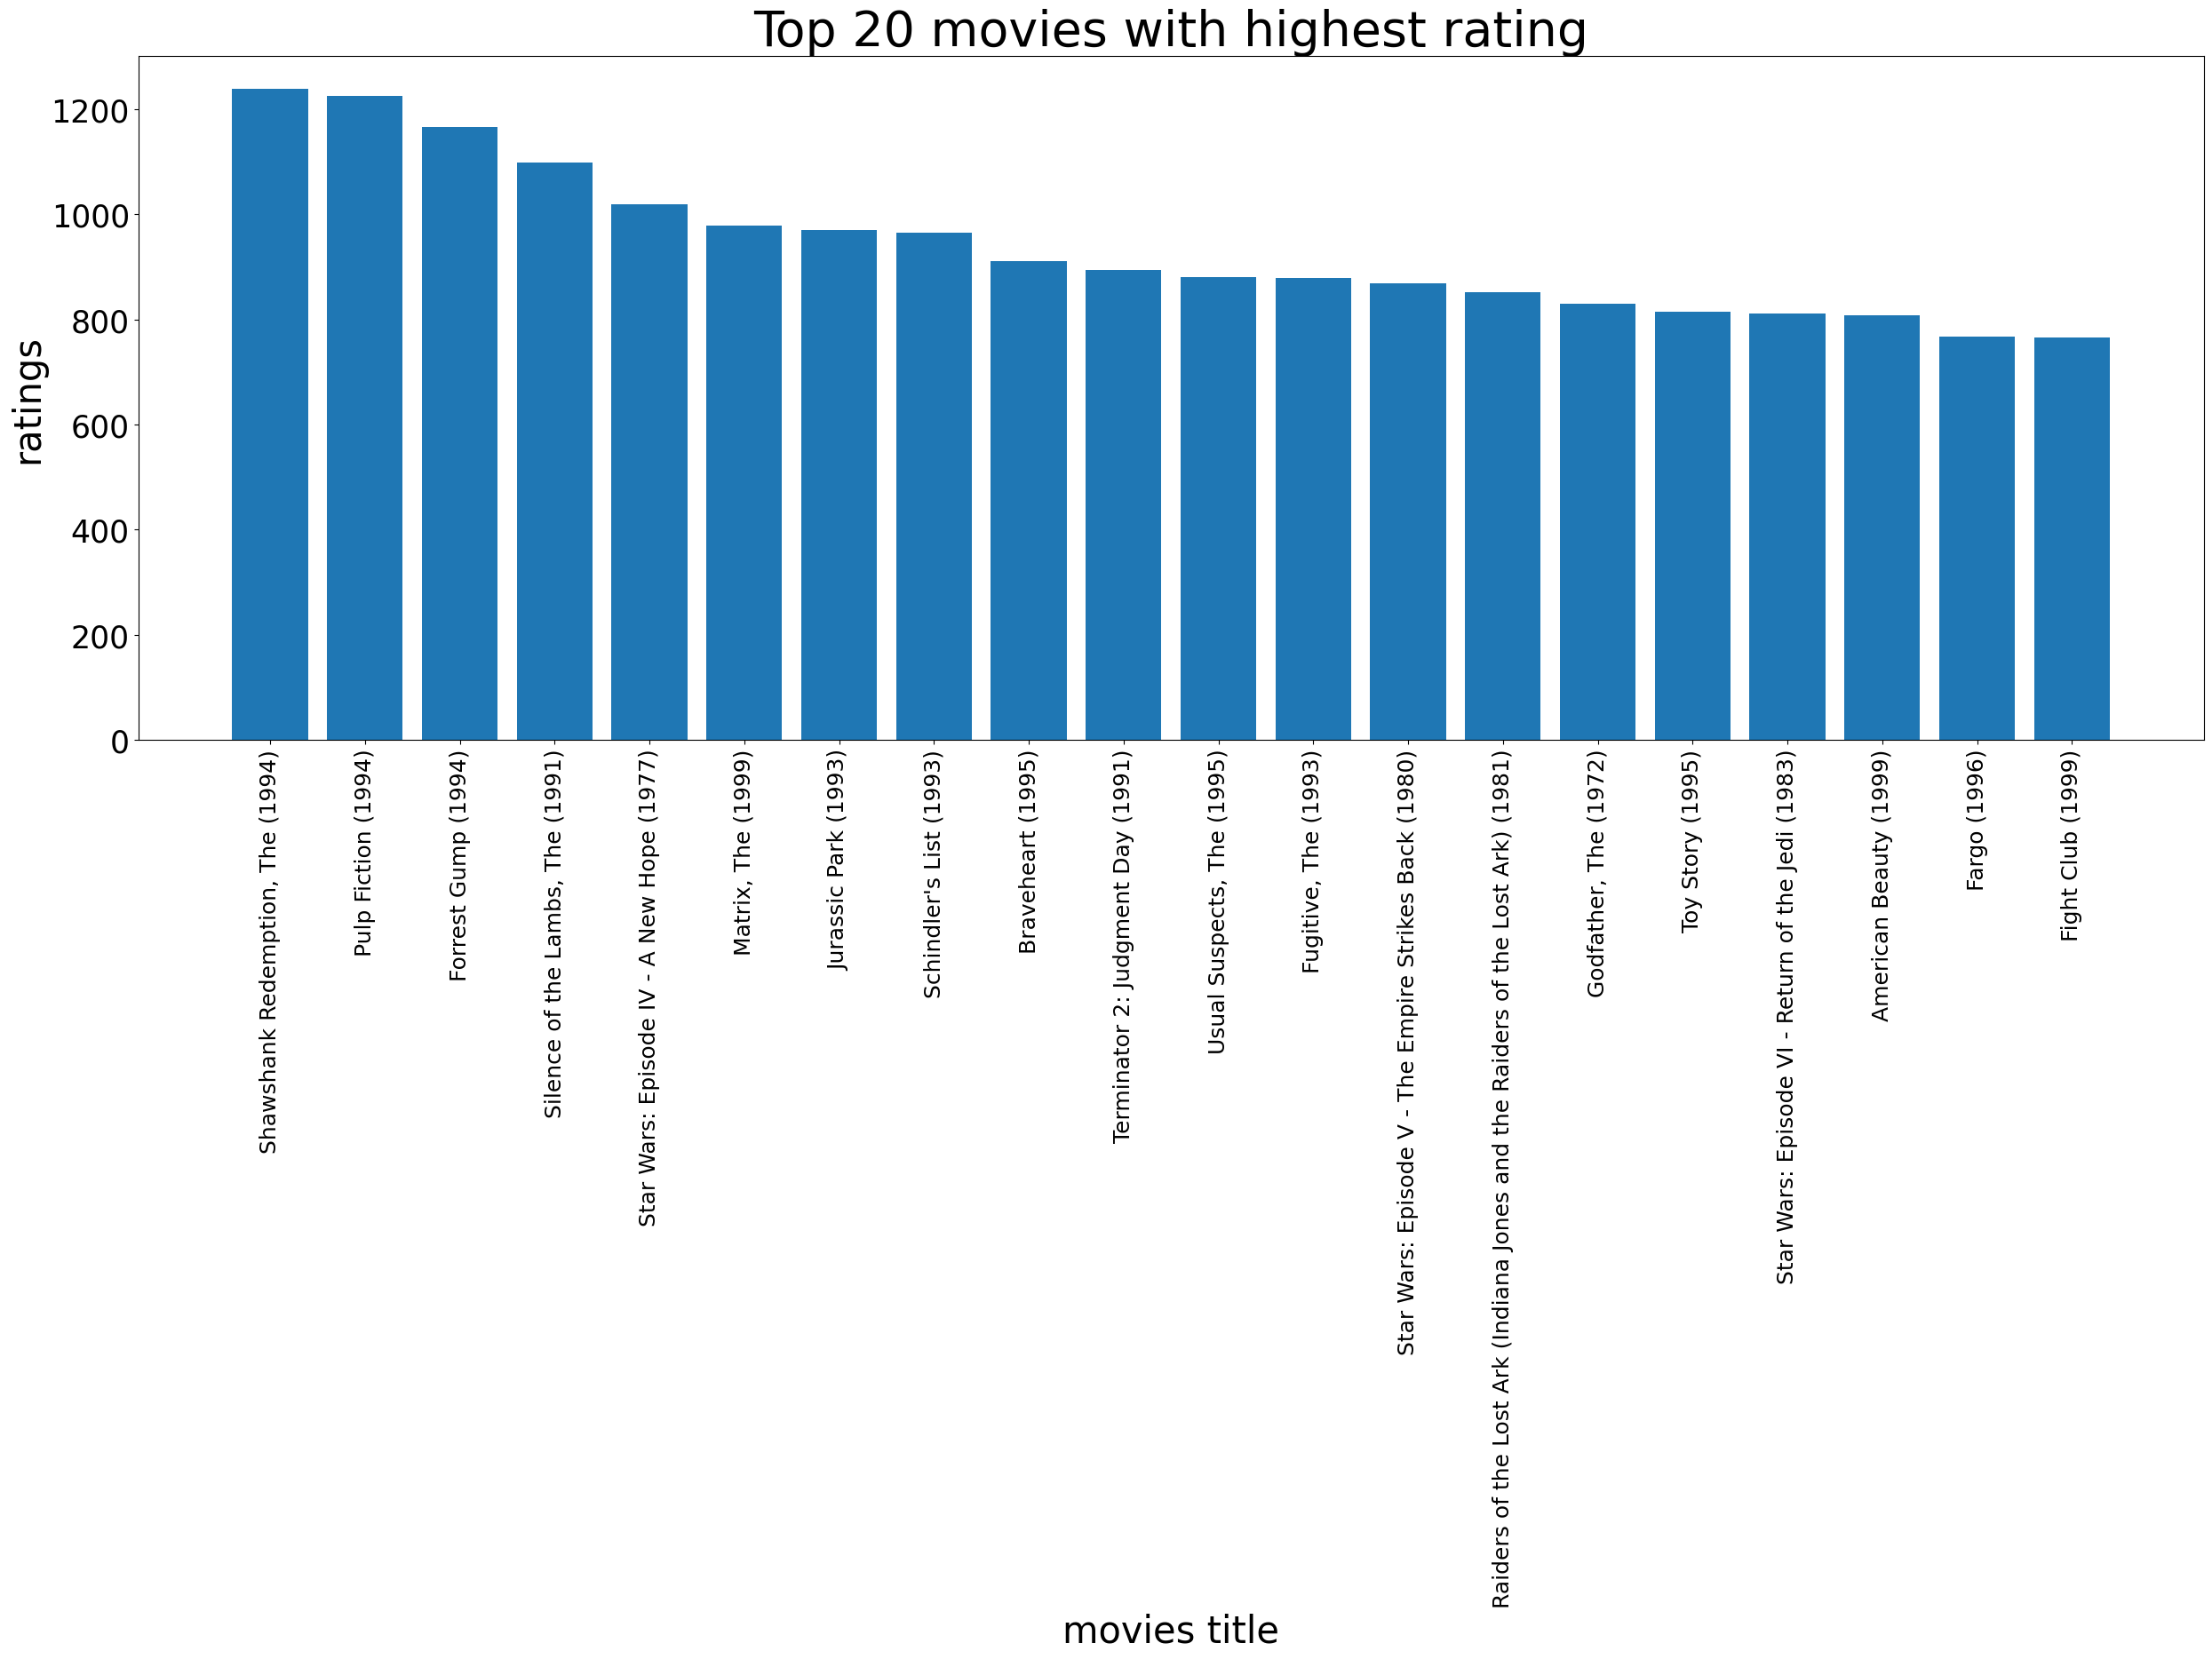

In [7]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest rating',fontsize=40)
plt.ylabel('ratings',fontsize=30)
plt.xticks(fontsize=18,rotation=90)
plt.xlabel('movies title',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['rating'],linewidth=3)

In [ ]:
df2=df.groupby('title')[['rating']].count()
rating_count_20=df2.nlargest(20,'rating')
rating_count_20.head()

<BarContainer object of 20 artists>

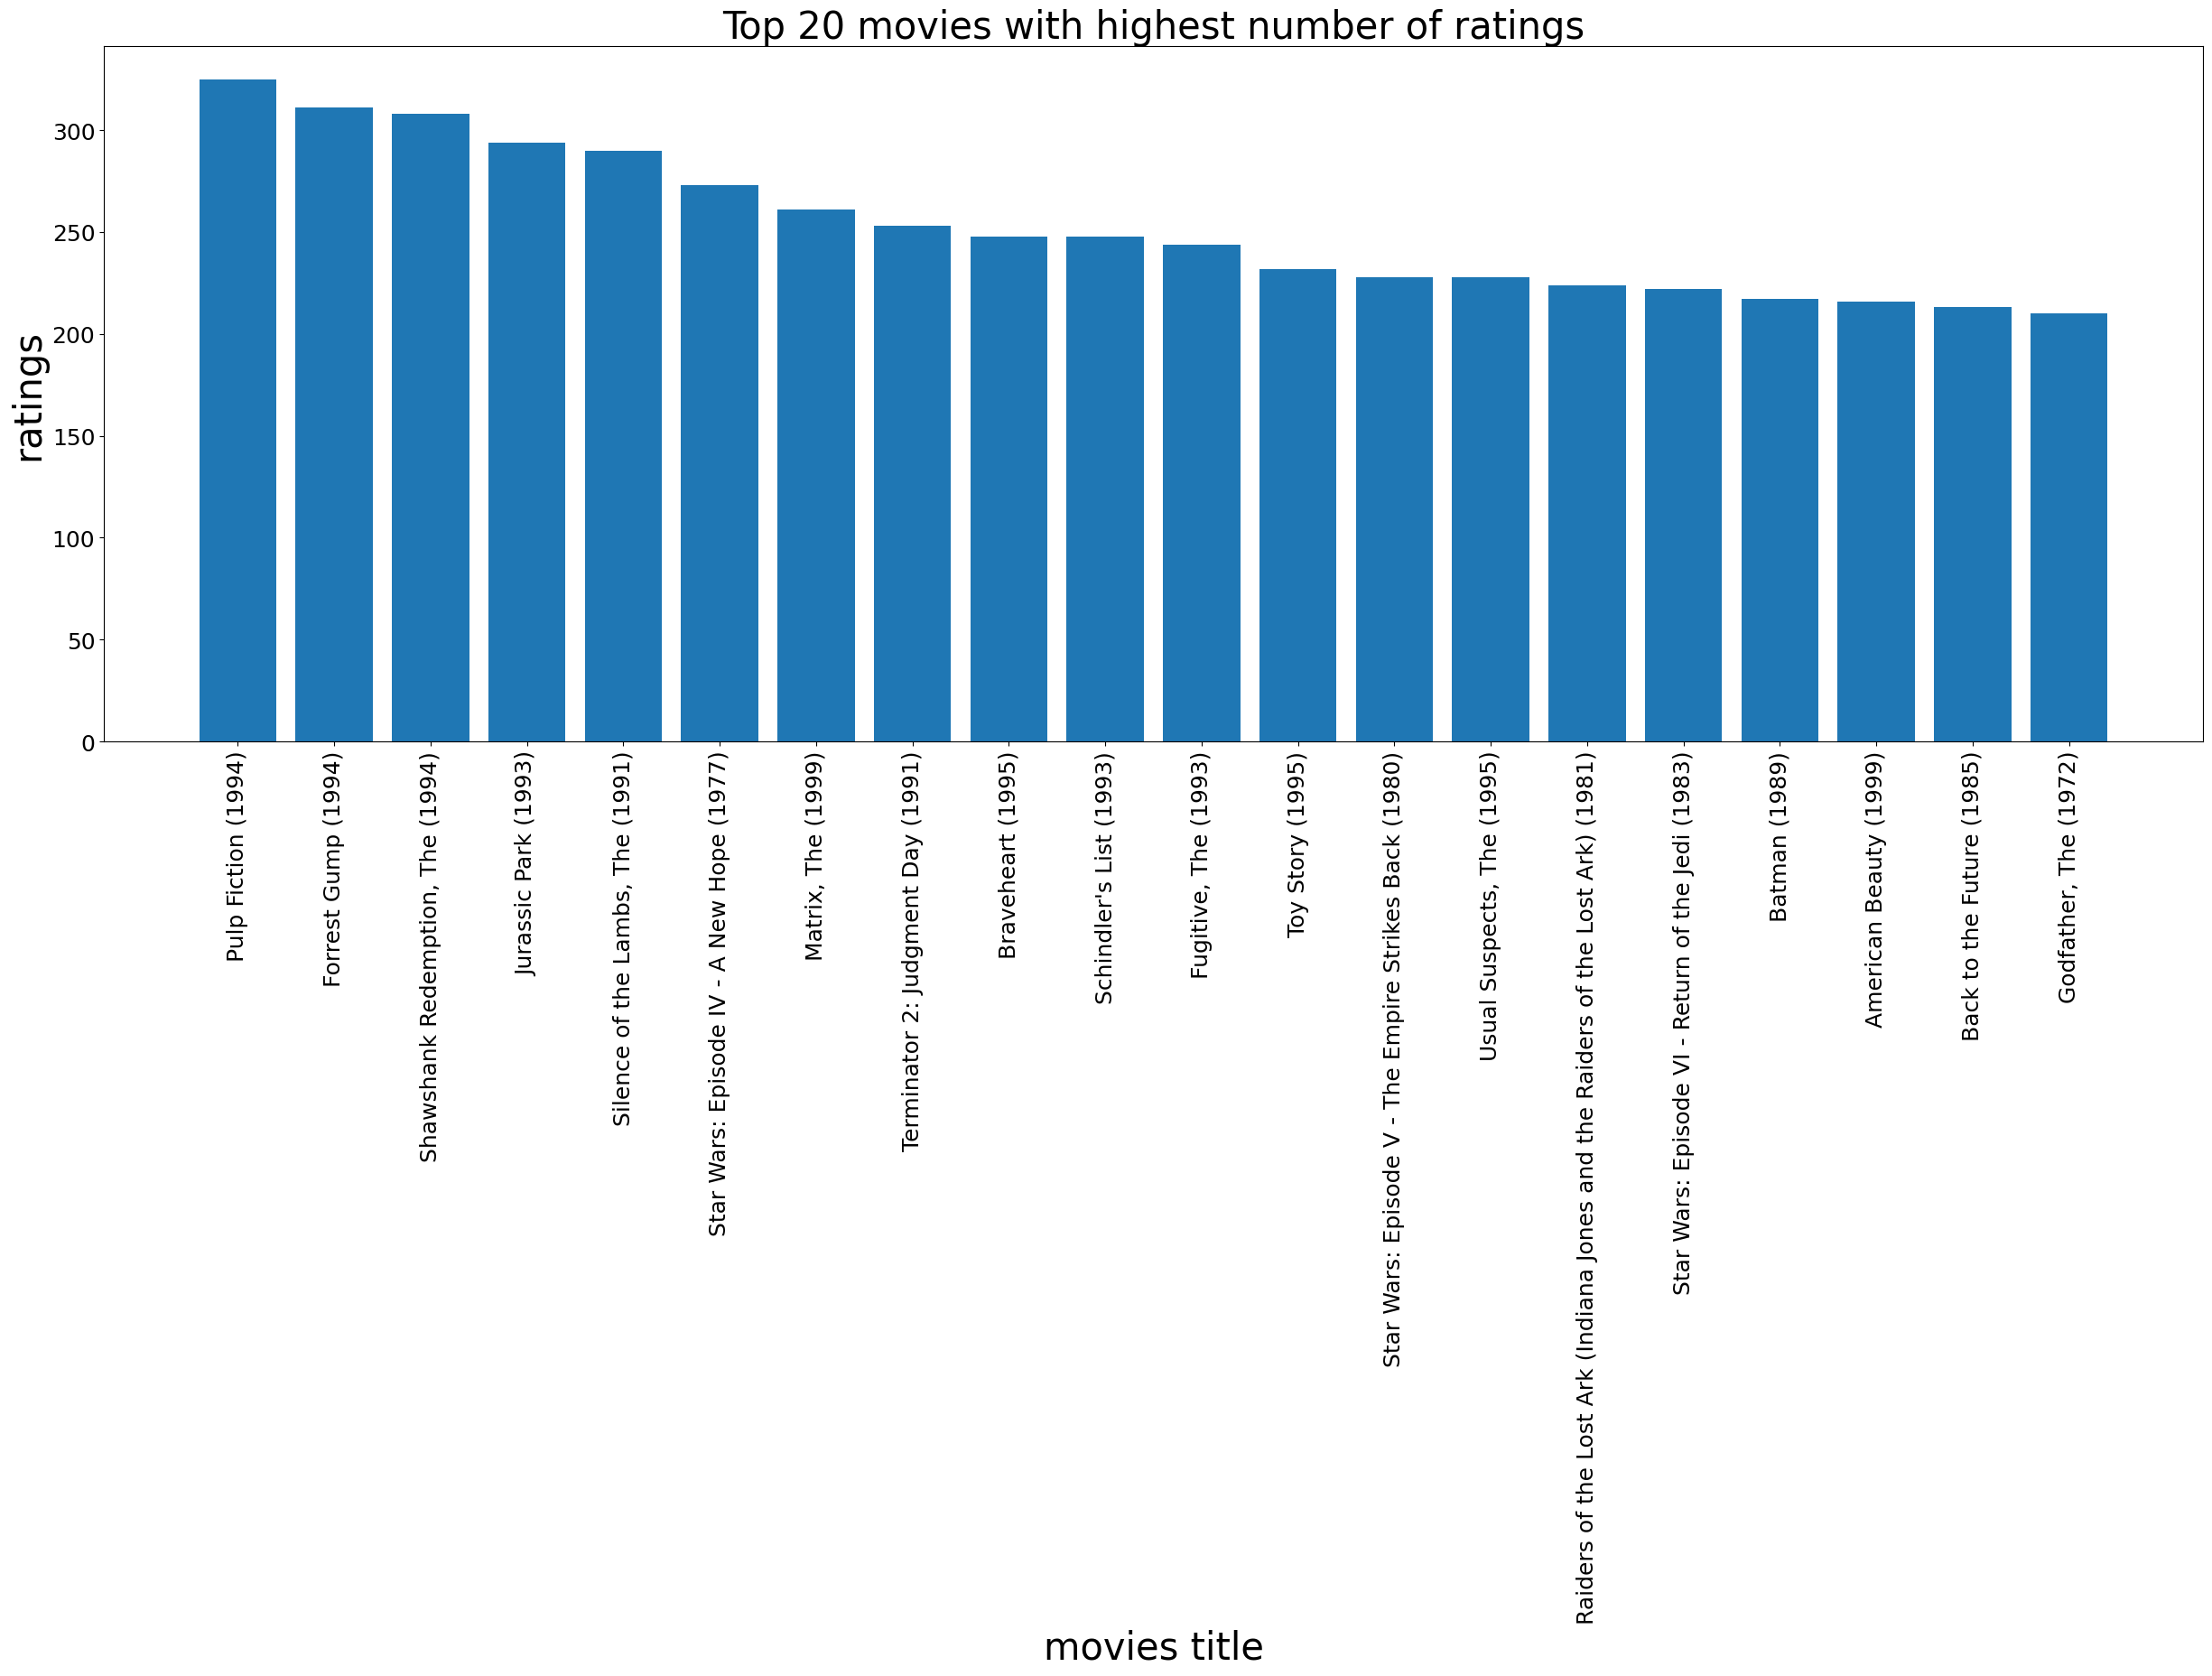

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest number of ratings',fontsize=30)
plt.xticks(fontsize=18,rotation=90)
plt.yticks(fontsize=18)
plt.xlabel('movies title',fontsize=30)
plt.ylabel('ratings',fontsize=30)

plt.bar(rating_count_20.index,rating_count_20.rating)

In [8]:
movie_user = df.pivot_table(index='userId',columns='title',values='rating')
movie_user

title,'Hellboy': The Seeds of Creation (2004),'Til There Was You (1997),"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),10 Items or Less (2006),10 Things I Hate About You (1999),"10,000 BC (2008)",...,Zone 39 (1997),Zookeeper (2011),Zoolander (2001),Zulu (1964),[REC] (2007),a/k/a Tommy Chong (2005),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
user_item_matrix = df.pivot_table(index='userId',columns='title',values='rating')
user_item_matrix = user_item_matrix.fillna(0)

In [ ]:
user_item_matrix

In [10]:
# Calculate the cosine similarity between movies
movie_similarity = cosine_similarity(user_item_matrix.T)
movie_similarity_df = pd.DataFrame(movie_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

In [ ]:
movie_similarity_df

In [11]:
def recommend_movies(fav_genre, fav_movie,n=8):
    # Filter movies by favorite genre
    genre_movies = df[df['genres'].str.contains(fav_genre)]

    # Check if any movies were filtered by genre
    if genre_movies.empty:
        return "No movies found matching the selected genre."

    # Filter movies similar to favorite movie
    if fav_movie in user_item_matrix.columns:
        similar_movies = movie_similarity_df[fav_movie].sort_values(ascending=False).index[1:n+1]
    else:
        return f"No similar movies found for '{fav_movie}'."


    recommended_movies = genre_movies[genre_movies['title'].isin(similar_movies)]['title'].unique()

    # Explicitly checking if recommended_movies is not None and has elements
    if recommended_movies is not None and len(recommended_movies) > 0:
        return recommended_movies[:n]
    else:
        return "No recommendations found."

In [ ]:
new = recommend_movies("Toy Story","Comedy")

In [ ]:
new